In [1]:
import sympy as sp
import sympy_utils as spu
import gr_utils as gru
import rewrite_utils as rwu
sp.init_printing()

\{U,U\}^{+}

\{U,U\}^{-}

[(Derivative(U(r, \theta), r),
  sqrt(\{U,U\}^{+} - Derivative(U(r, \theta), r)**2/r**2)),
 (Derivative(U(r, \theta), r),
  sqrt(\{U,U\}^{-} + Derivative(U(r, \theta), r)**2/r**2))]

[(\{U,U\}^{+},
  Derivative(U(r, \theta), r)**2 + Derivative(U(r, \theta), r)**2/r**2),
 (\{U,U\}^{-},
  Derivative(U(r, \theta), r)**2 - Derivative(U(r, \theta), r)**2/r**2)]

# Generating unrolled expressions for GRHD source terms

See eqs (25) in arXiv:1104.4751v3

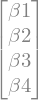

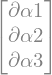

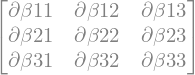

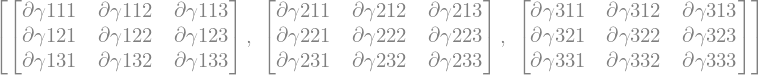

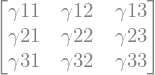

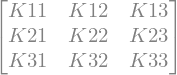

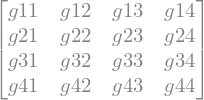

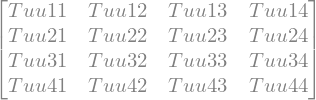

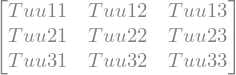

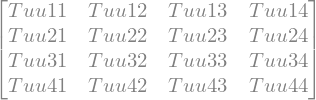

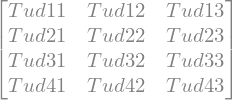

In [2]:
# setting up vars
beta = sp.Matrix(sp.symbols(r'\beta{1:5}')); display(beta)
alpha = sp.symbols(r'\alpha'); display(alpha)
dalpha = sp.Matrix(sp.symbols(r'\partial\alpha{1:4}')); display(dalpha)
dbeta = sp.Matrix(3,3,sp.symbols(r'\partial\beta{1:4}{1:4}')); display(dbeta)
dgamma = [ sp.Matrix(3,3,sp.symbols(r'\partial\gamma{}{{1:4}}{{1:4}}'.format(i))) for i in range(1,4) ]; display(dgamma)
gamma = sp.Matrix(3,3,sp.symbols(r'\gamma{{1:4}{1:4}}')); display(gamma)
K = sp.Matrix(3,3,sp.symbols(r'K{{1:4}{1:4}}')); display(K)
g = sp.Matrix(4,4,sp.symbols(r'g{{1:5}{1:5}}')); display(g)
Tuu = sp.Matrix(4,4,sp.symbols(r'Tuu{{1:5}{1:5}}')); display(Tuu)
sTuu = Tuu[:-1,:-1]; display(sTuu)
Tud = sp.Matrix(4,4,sp.symbols(r'Tud{{1:5}{1:5}}')); display(Tuu)
sTud = Tud[:,:-1]; display(sTud)

In [3]:
# dictionary with substiution rules for printing results
subs_dict = {
  r'\partial' : '∂',
  r'\gamma'   : 'γ',
  r'\beta'    : 'β',
  r'\alpha'   : 'α',
  '{'         : '',
  '}'         : '',
  '**'        : '^',
}

def subsymbols(ex):
    str_ex = str(ex)
    for key, val in subs_dict.items():
        str_ex = str_ex.replace(key, val)
    return str_ex

$$
s_{S,k} = T^{00} (\frac{1}{2} \beta^i \beta^j \partial_k \gamma_{ij} - \alpha \partial_k \alpha) + T^{0i} \beta^j \partial_k \gamma_{ij} + T^0_i \partial_k \beta^i + \frac{1}{2} T^{ij} \partial_k \gamma_{ij}
$$

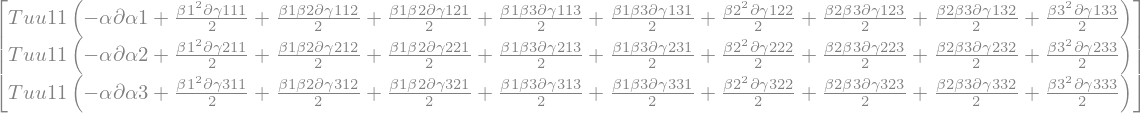

In [4]:
term1 = sp.zeros(3,1)
oh = sp.Rational(1,2)
for k in range(3):
    tmp = 0
    for i in range(3):
        for j in range(3):
            tmp += oh * beta[i] * beta[j] * dgamma[k][i,j]
    tmp += - alpha * dalpha[k]
    term1[k] = Tuu[0,0] * tmp
display(term1)

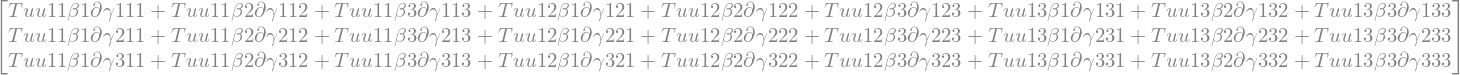

In [5]:
term2 = sp.zeros(3,1)
for k in range(3):
    tmp = 0
    for i in range(3):
        for j in range(3):
            tmp += sTuu[0,i] * beta[j] * dgamma[k][i,j]
    term2[k] = tmp
display(term2)

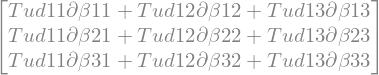

In [6]:
term3 = sp.zeros(3,1)
for k in range(3):
    tmp = 0
    for i in range(3):
        tmp += sTud[0,i] * dbeta[k,i]
    term3[k] = tmp
display(term3)

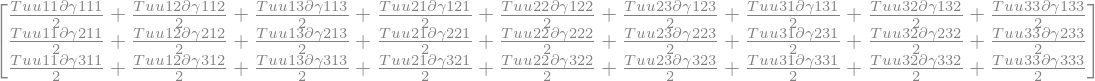

In [7]:
term4 = sp.zeros(3,1)
for k in range(3):
    tmp = 0
    for i in range(3):
        for j in range(3):
            tmp += sTuu[i,j] * dgamma[k][i,j]
    term4[k] = oh * tmp
display(term4)

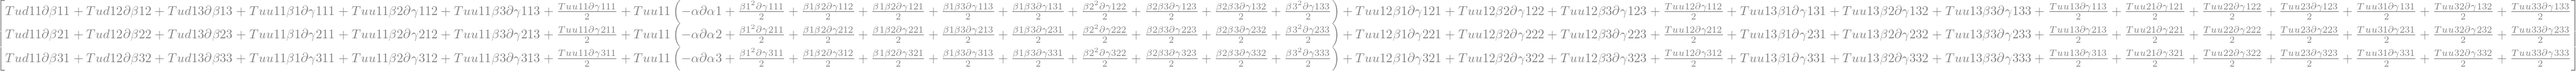

In [8]:
s_S = term1 + term2 + term3 + term4
#s_S = term2 + term3 + term4
#s_S = term4
s_S

In [9]:
for k in range(3):
    print(f's_S{k+1} =',subsymbols(s_S[k]))

s_S1 = Tud11*∂β11 + Tud12*∂β12 + Tud13*∂β13 + Tuu11*β1*∂γ111 + Tuu11*β2*∂γ112 + Tuu11*β3*∂γ113 + Tuu11*∂γ111/2 + Tuu11*(-α*∂α1 + β1^2*∂γ111/2 + β1*β2*∂γ112/2 + β1*β2*∂γ121/2 + β1*β3*∂γ113/2 + β1*β3*∂γ131/2 + β2^2*∂γ122/2 + β2*β3*∂γ123/2 + β2*β3*∂γ132/2 + β3^2*∂γ133/2) + Tuu12*β1*∂γ121 + Tuu12*β2*∂γ122 + Tuu12*β3*∂γ123 + Tuu12*∂γ112/2 + Tuu13*β1*∂γ131 + Tuu13*β2*∂γ132 + Tuu13*β3*∂γ133 + Tuu13*∂γ113/2 + Tuu21*∂γ121/2 + Tuu22*∂γ122/2 + Tuu23*∂γ123/2 + Tuu31*∂γ131/2 + Tuu32*∂γ132/2 + Tuu33*∂γ133/2
s_S2 = Tud11*∂β21 + Tud12*∂β22 + Tud13*∂β23 + Tuu11*β1*∂γ211 + Tuu11*β2*∂γ212 + Tuu11*β3*∂γ213 + Tuu11*∂γ211/2 + Tuu11*(-α*∂α2 + β1^2*∂γ211/2 + β1*β2*∂γ212/2 + β1*β2*∂γ221/2 + β1*β3*∂γ213/2 + β1*β3*∂γ231/2 + β2^2*∂γ222/2 + β2*β3*∂γ223/2 + β2*β3*∂γ232/2 + β3^2*∂γ233/2) + Tuu12*β1*∂γ221 + Tuu12*β2*∂γ222 + Tuu12*β3*∂γ223 + Tuu12*∂γ212/2 + Tuu13*β1*∂γ231 + Tuu13*β2*∂γ232 + Tuu13*β3*∂γ233 + Tuu13*∂γ213/2 + Tuu21*∂γ221/2 + Tuu22*∂γ222/2 + Tuu23*∂γ223/2 + Tuu31*∂γ231/2 + Tuu32*∂γ232/2 + Tuu33*∂γ233/2
s_

$$
s_{\tau} = T^{00} (\beta^i \beta^j K_{ij} - \beta^i \partial_i \alpha) + T^{0i} (2 \beta^j K_{ij} - \partial_i \alpha) + T^{ij} K_{ij}
$$

In [10]:
term1 = 0
for i in range(3):
    for j in range(3):
        term1 += beta[i] * beta[j] * K[i,j]
    term1 +=  - beta[i] * dalpha[i]
term1 *= Tuu[0,0]
display(term1)

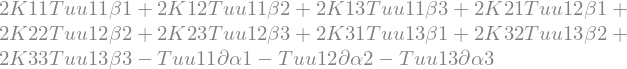

In [11]:
term2 = 0
for i in range(3):
    for j in range(3):
        term2 += sTuu[0,i] * 2 * beta[j] * K[i,j]
    term2 +=  - sTuu[0,i] * dalpha[i]
display(term2)

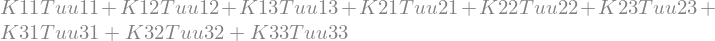

In [12]:
term3 = 0
for i in range(3):
    for j in range(3):
        term3 += sTuu[i,j] * K[i,j]
display(term3)

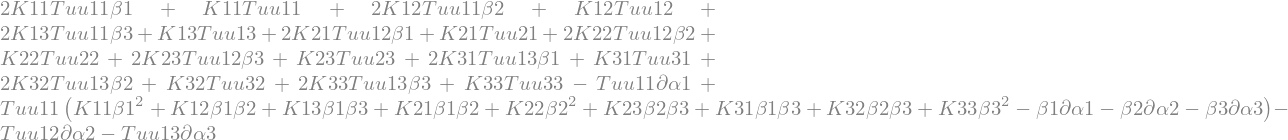

In [13]:
s_tau = term1 + term2 + term3
s_tau

In [14]:
print(f's_tau{k+1} =', subsymbols(s_tau))

s_tau3 = 2*K11*Tuu11*β1 + K11*Tuu11 + 2*K12*Tuu11*β2 + K12*Tuu12 + 2*K13*Tuu11*β3 + K13*Tuu13 + 2*K21*Tuu12*β1 + K21*Tuu21 + 2*K22*Tuu12*β2 + K22*Tuu22 + 2*K23*Tuu12*β3 + K23*Tuu23 + 2*K31*Tuu13*β1 + K31*Tuu31 + 2*K32*Tuu13*β2 + K32*Tuu32 + 2*K33*Tuu13*β3 + K33*Tuu33 - Tuu11*∂α1 + Tuu11*(K11*β1^2 + K12*β1*β2 + K13*β1*β3 + K21*β1*β2 + K22*β2^2 + K23*β2*β3 + K31*β1*β3 + K32*β2*β3 + K33*β3^2 - β1*∂α1 - β2*∂α2 - β3*∂α3) - Tuu12*∂α2 - Tuu13*∂α3


### Write output to file

In [15]:
import os
# one attempt on getting the notebook's directory path:
# https://stackoverflow.com/questions/52119454/how-to-obtain-jupyter-notebooks-path
thisdir = os.path.abspath("")
outputname = os.path.normpath(os.path.join(thisdir,"grhd_sources.ref.txt"))
print(outputname)

/home/flo/wd/TensorComponents.jl/math/grhd_sources.ref.txt


In [16]:
with open(outputname, "w") as file:
    file.write("# generated with math/grhd_sources.ipynb\n")
    for k in range(3):
        file.write(f's_S{k+1} = ' + subsymbols(s_S[k]) + '\n')
    file.write(f's_tau = ' + subsymbols(s_tau) + '\n')